# EDA

First Import all the libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

In [96]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [97]:
df.drop(index=[122,123], inplace=True) # removing rows
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [100]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [101]:
# make date time column

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05


In [102]:
df.columns = [i.strip() for i in df.columns] # stripping column names

In [ ]:
df.Classes = df.Classes.str.strip() # stripping Classes feature

In [ ]:
df.replace('nan', np.nan) # replacing nan and null string with object
df.replace('null', np.nan)

In [133]:
df.dropna(inplace=True) # dropping rows in NaN or Null values

In [136]:
# changing dtypes to numerical

df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

In [137]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05


## Profile of Data

In [138]:
df.shape

(243, 13)

dataset total has 243 rows and 15 columns

feature information - 
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [139]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    object        
 11  region       243 non-null    object        
 12  date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 26.6+ KB


this dataset do not have any null values 

In [141]:
df.isna().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

DO NOT HAVE ANY NULL VALUES

In [144]:
cat_cols = [i for i in df.columns if df[i].dtype == 'O'] # categorical columns
num_cols = [i for i in df.columns if df[i].dtype != 'O'] # numerical columns
df_cat = df[cat_cols] # dataframe with categorical columns
df_num = df[num_cols] # dataframe with numerical columns

In [145]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [147]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
region           2
date           122
dtype: int64

In [148]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

Classes has two unique categories

In [149]:
df.region.unique()

array(['bejaia', 'Sidi-Bel Abbes'], dtype=object)

region has two unique categories

In [150]:
df.memory_usage()

Index          1944
Temperature    1944
RH             1944
Ws             1944
Rain           1944
FFMC           1944
DMC            1944
DC             1944
ISI            1944
BUI            1944
FWI            1944
Classes        1944
region         1944
date           1944
dtype: int64

memory usage

## Univariate analysis

In [151]:
df.var()

C:\Users\hitesh wadhwani\AppData\Local\Temp\ipykernel_3380\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Temperature      13.162670
RH              219.874333
Ws                7.903887
Rain              4.012837
FFMC            205.912204
DMC             153.587434
DC             2272.009994
ISI              17.257659
BUI             202.447968
FWI              55.362048
dtype: float64

* variance of Drought Code (DC) is very large it means values are spread from each other

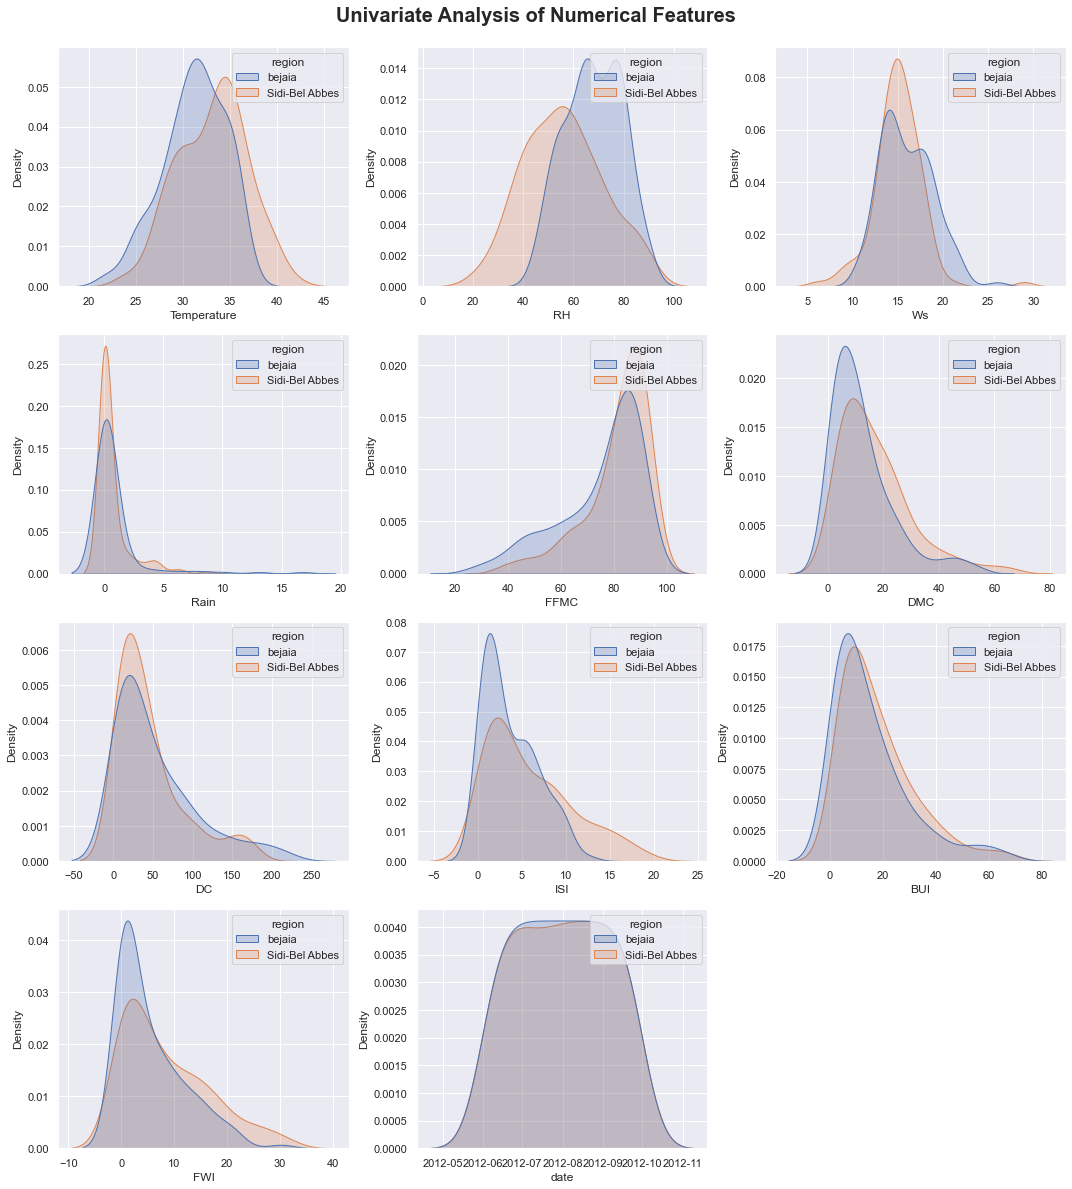

In [171]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=num_cols[i],shade=True, color='b', hue='region', data=df)
    plt.xlabel(num_cols[i])
    plt.tight_layout()

**observation -**

* Features like rain, dmc, dc, ICI, BUI, FWI follow log normal distribution (Right skewed) it mean they have exceptional exptreme values
* features like temperature , RH, WS follow normal distribution 

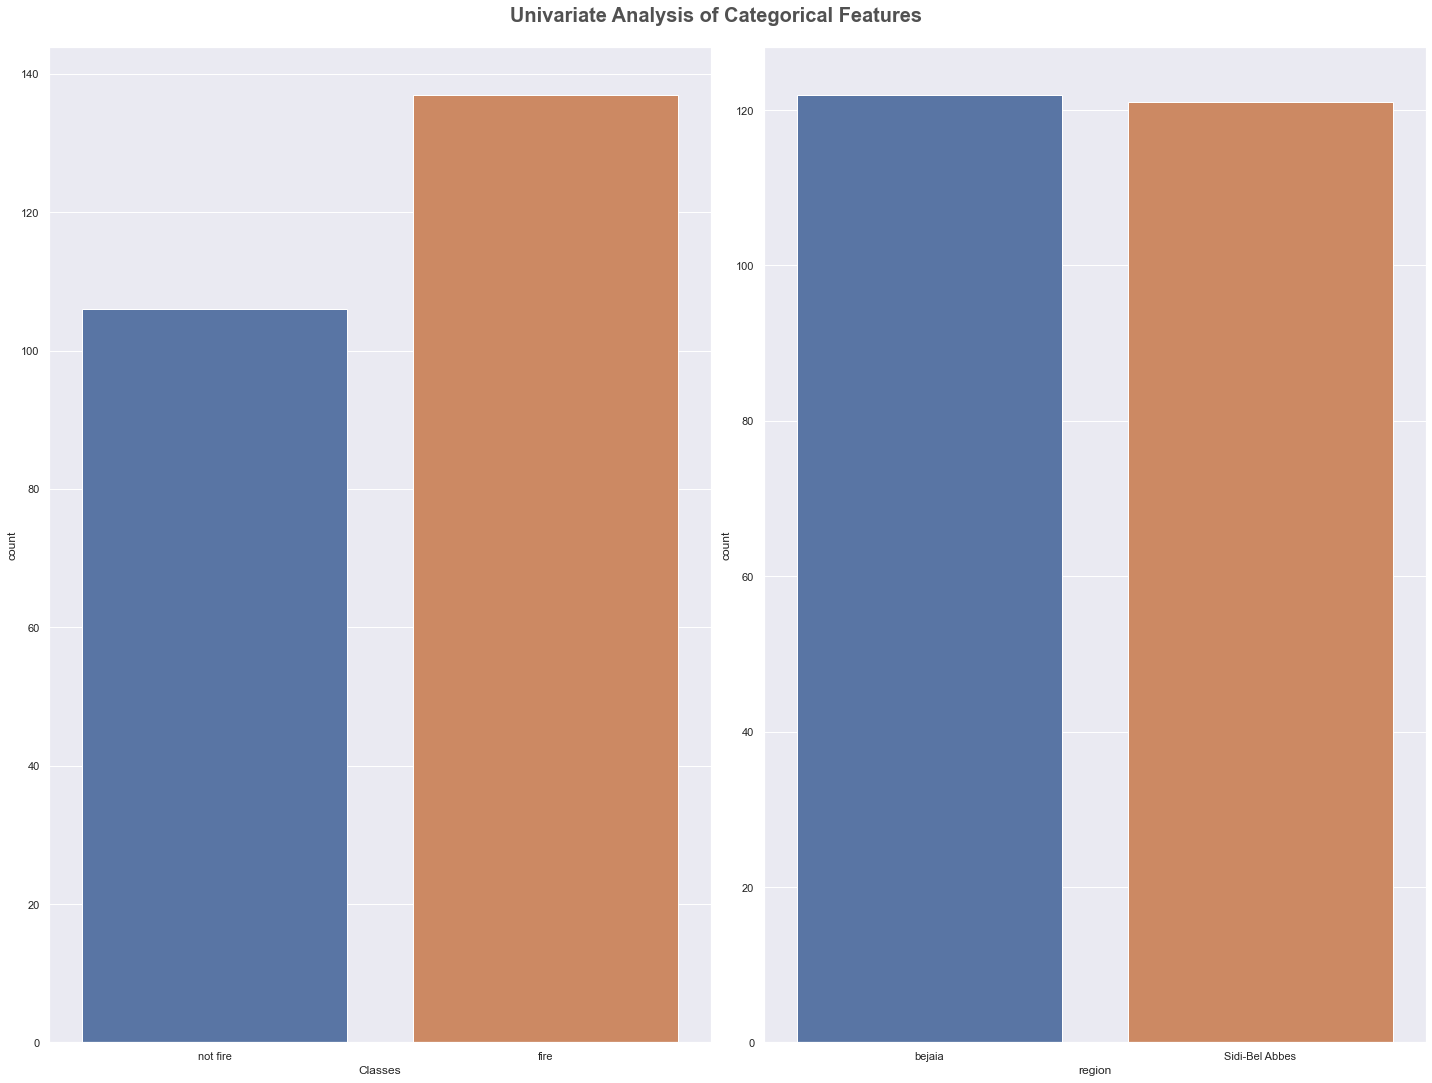

In [173]:
# categorical features

plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xlabel(cat_cols[i])
    plt.tight_layout()

**observation -**
* Most of the time there is fire

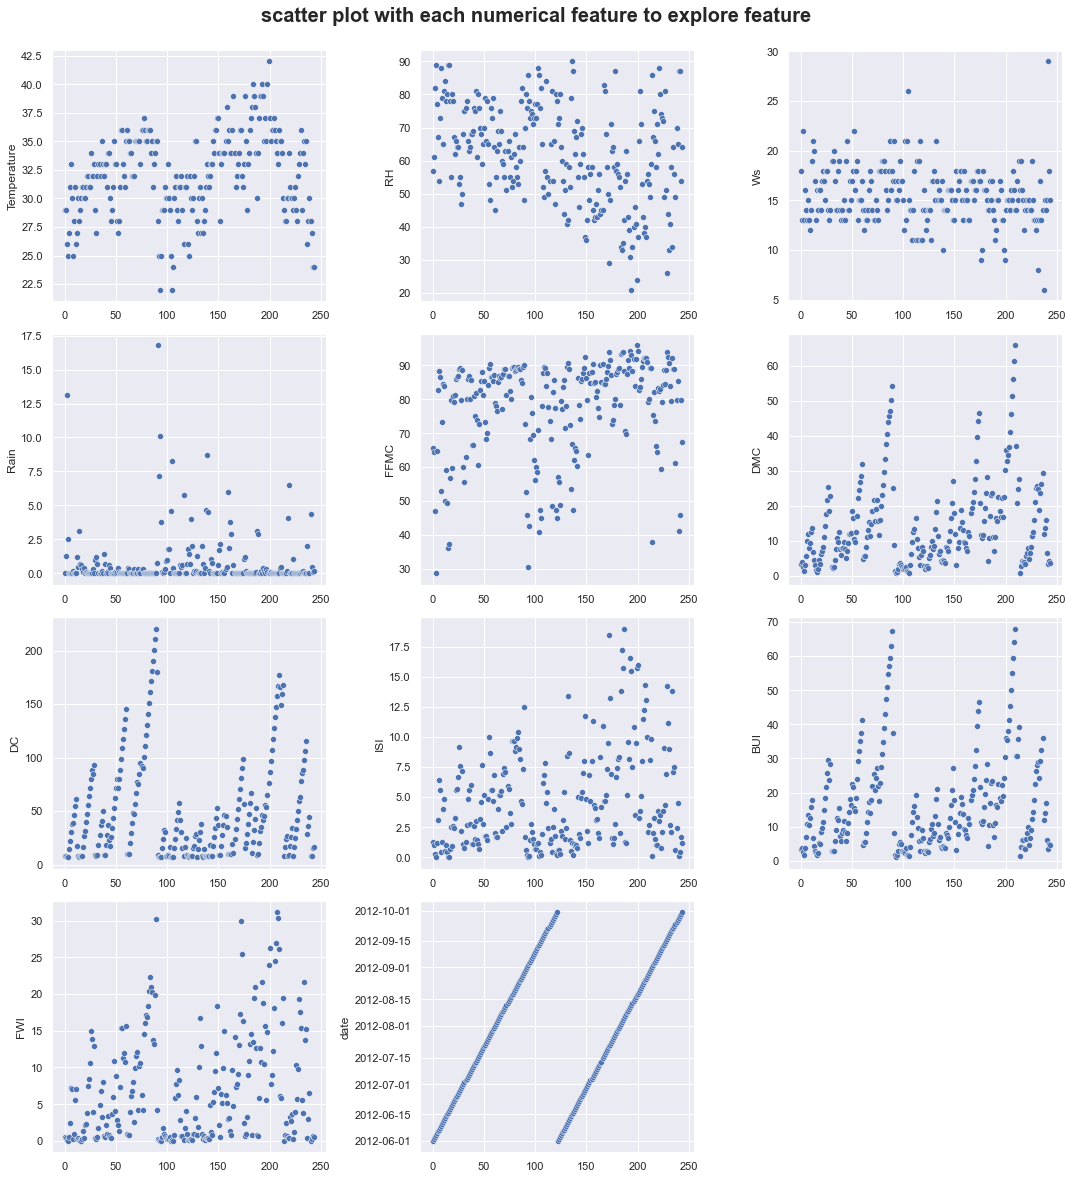

In [184]:
# scatter plot to see the trends in each numerical column

plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=num_cols[i], x=df.index, data=df)
    plt.tight_layout()

**observation -**
* Extreme value of Temperature is above 40
* Most of the time RH is above 30
* WS values lie between 10 to 20

## Bivariate analysis and multivariate analysis

In [185]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

### Multicolleniarity in numerical features

In [186]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000


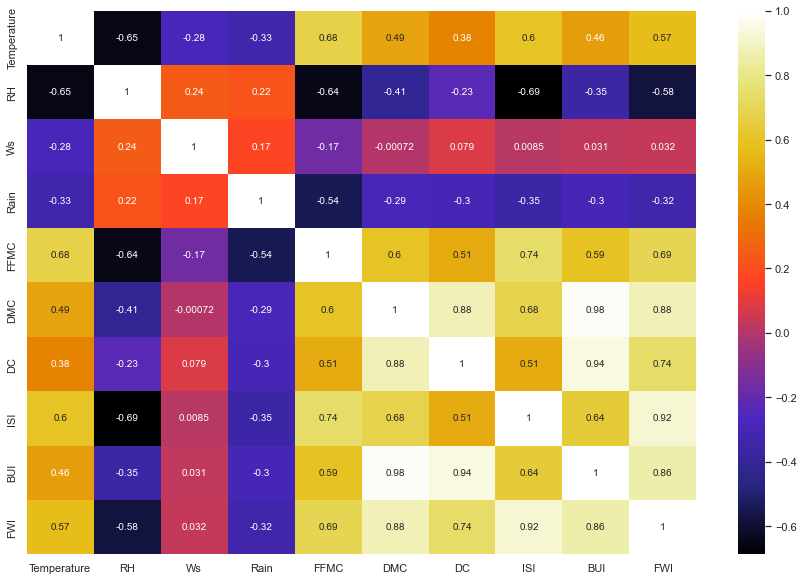

In [187]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**observation -**
* Highly +ve correlated features are DMC and BUI, DC and BUI, ISI and PWI
* Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ICI

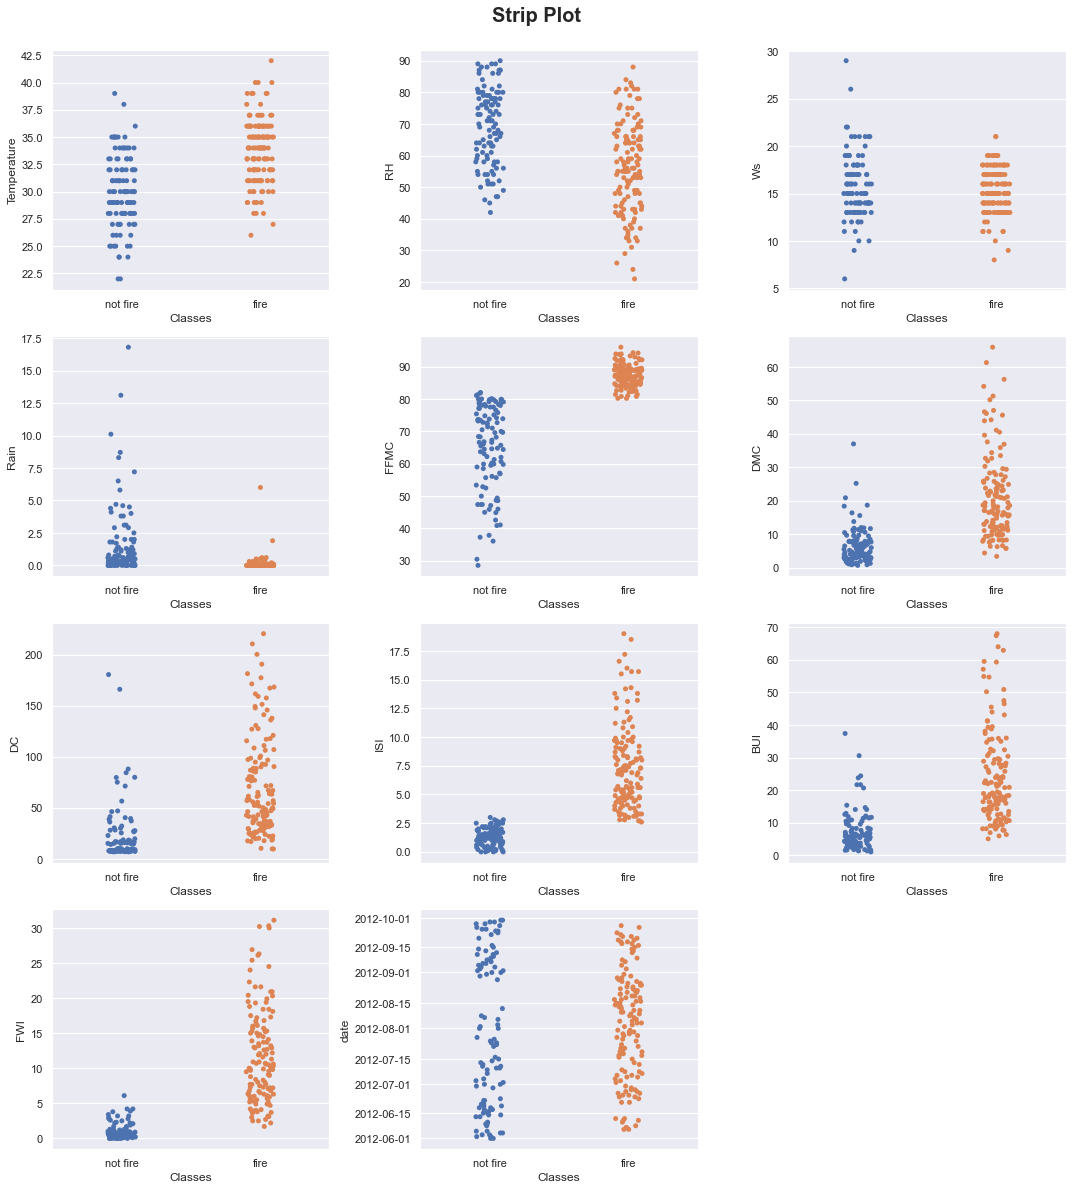

In [192]:
# strip plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=num_cols[i], x='Classes', data=df)
    plt.tight_layout()

**observation -**
* places with higher temperature has fire
* places with lower RH has fire
* places wiht ffmc > 80 has fire
* places wiht ICI > 2.5 has fire
* places with FWI > 4 has fire

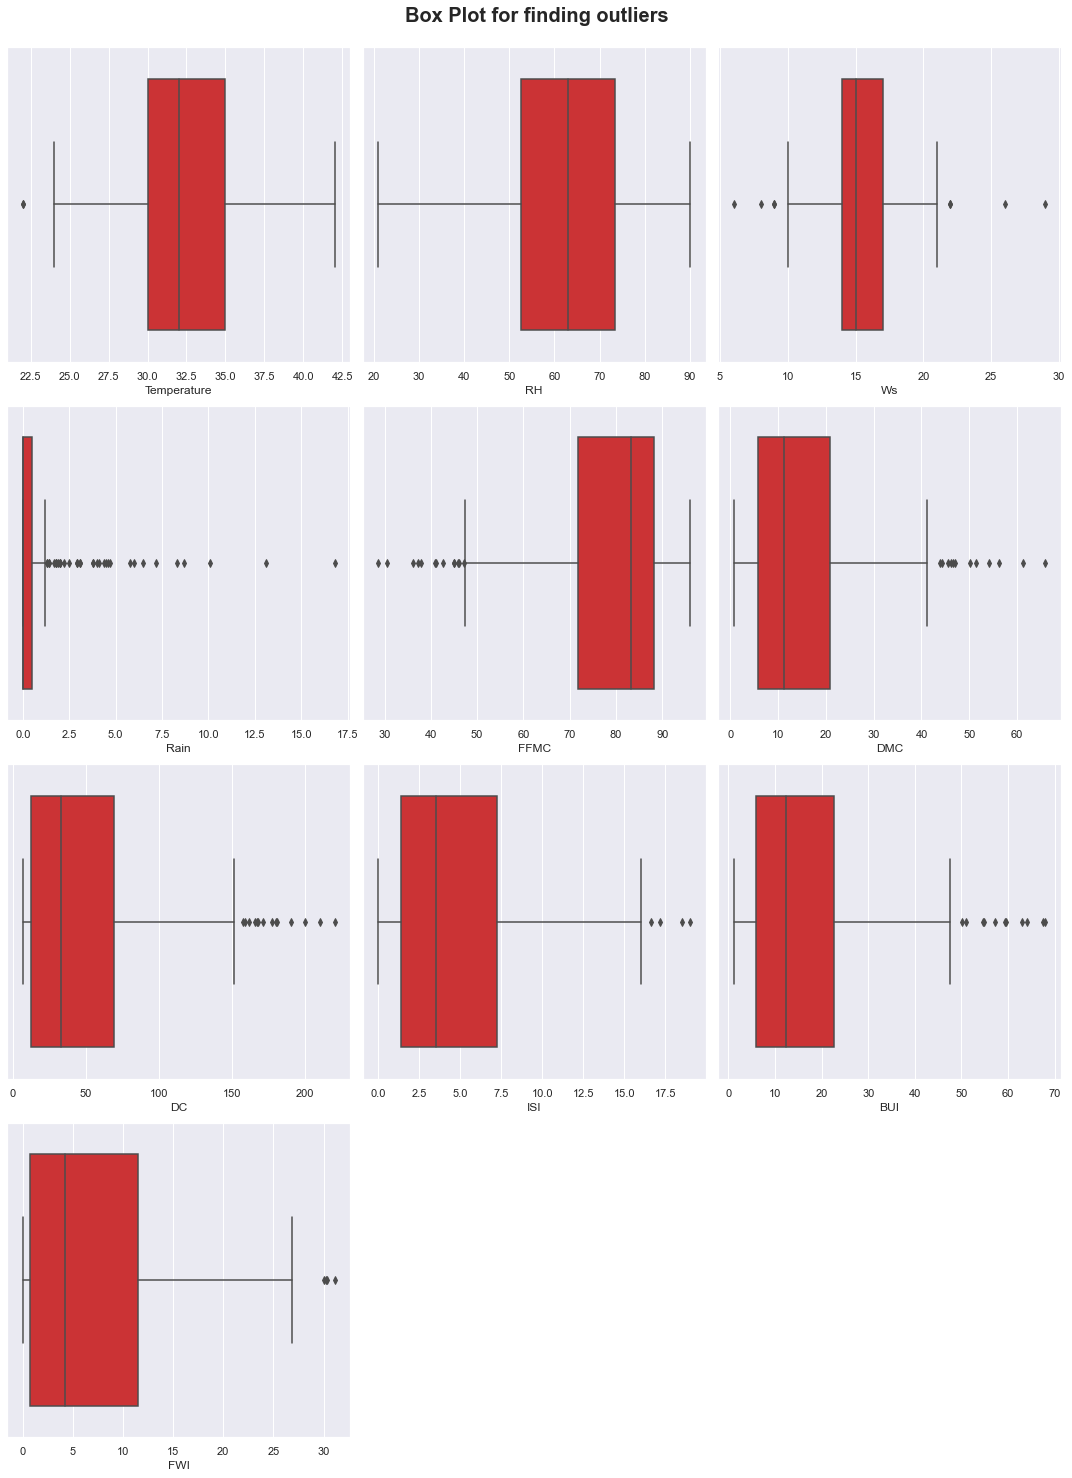

In [220]:
# boxplot to find out ouliers in the features    
rows = 5
cols = 3
fig = plt.figure( figsize=(cols*5, rows*5))
plt.suptitle('Box Plot for finding outliers', fontsize=20, fontweight='bold', alpha=1, y=1)


for i, col in enumerate(num_cols[:10]):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = col,orient='v', data=df, palette="Set1")
fig.tight_layout()  
plt.show()

**observation -**
* Rain , DC and BUI has many outlies which should be handled

In [226]:
df1 = df.groupby('region')['target'].sum()

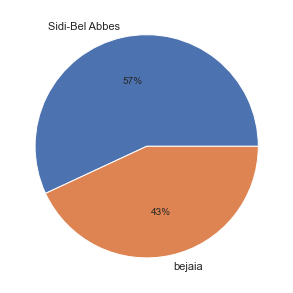

In [230]:
# pie chart to show which region has more fires

plt.figure(figsize=(5,8))
plt.pie(df1, labels=df1.index, autopct="%.0f%%")
plt.show()

**observation -**
* sisi-Bel abbes has more fire

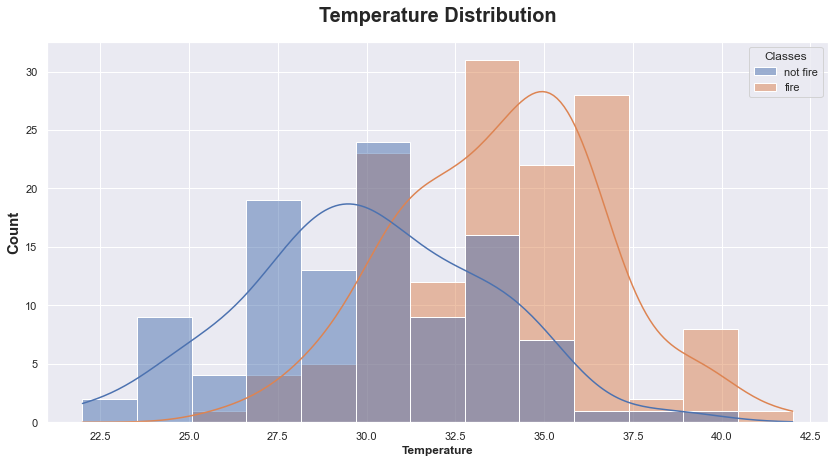

In [238]:
plt.subplots(figsize=(14,7))
sns.histplot(data=df, x=df.Temperature,hue='Classes', color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

**observation -**
* Fire places have temperature between 32 to 37.5

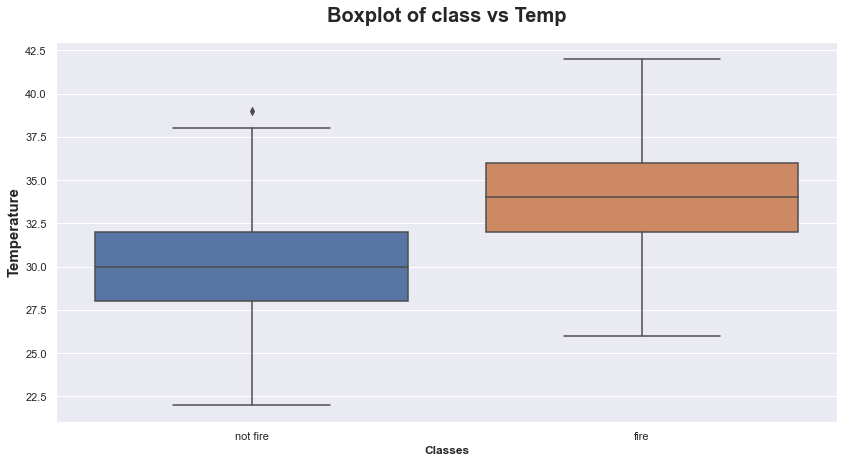

In [244]:
plt.subplots(figsize=(14,7))
sns.boxplot(x = 'Classes', y='Temperature',data=df)
plt.title("Boxplot of class vs Temp", weight="bold",fontsize=20, pad=20)
plt.ylabel("Temperature", weight="bold", fontsize=15)
plt.xlabel("Classes", weight="bold", fontsize=12)
plt.show()

**observation -**
* one day at high temperature fire does not occur

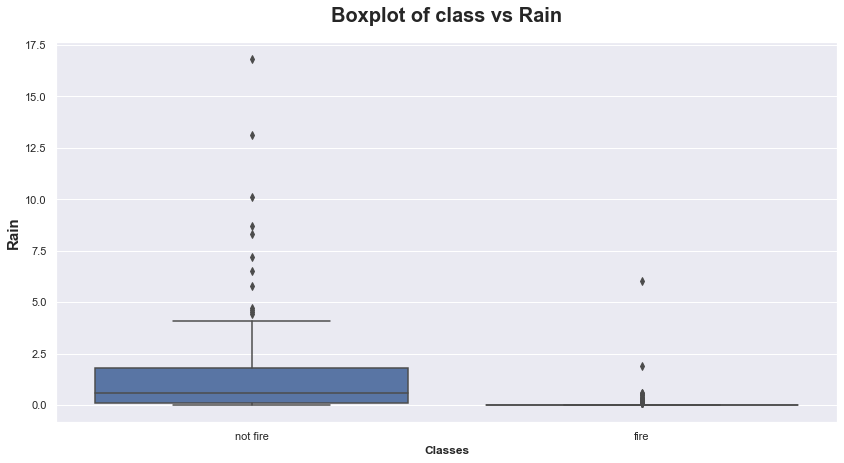

In [246]:
plt.subplots(figsize=(14,7))
sns.boxplot(x = 'Classes', y='Rain',data=df)
plt.title("Boxplot of class vs Rain", weight="bold",fontsize=20, pad=20)
plt.ylabel("Rain", weight="bold", fontsize=15)
plt.xlabel("Classes", weight="bold", fontsize=12)
plt.show()

**observation -**
* At some Days after having rain fire occur